In [1]:
import torch
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [2]:
X_train = utils.createMNIST('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
Y_train = utils.createMNIST('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')

X_test = utils.createMNIST('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
Y_test = utils.createMNIST('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

In [42]:

class Deepnetworks(torch.nn.Module):

    def __init__(self, hidden_layer):

        super().__init__()
        self.l1 = nn.Linear(784, hidden_layer)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(hidden_layer, 10)
    
    def forward(self, x):

        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)

        return x


In [8]:
model2 = Deepnetworks(128)
model2.l1.weight

Parameter containing:
tensor([[ 0.0020,  0.0070, -0.0155,  ...,  0.0150, -0.0095, -0.0201],
        [-0.0053,  0.0004,  0.0002,  ...,  0.0163,  0.0216,  0.0306],
        [-0.0138, -0.0156, -0.0294,  ...,  0.0167, -0.0343, -0.0012],
        ...,
        [-0.0305,  0.0152,  0.0356,  ...,  0.0283, -0.0340, -0.0071],
        [-0.0342, -0.0322, -0.0306,  ..., -0.0109,  0.0162,  0.0021],
        [-0.0320, -0.0112, -0.0036,  ..., -0.0230,  0.0348,  0.0148]],
       requires_grad=True)

In [65]:
torch.manual_seed(42)
np.random.seed(42)

hidden_layer = 128

model = Deepnetworks(hidden_layer)
loss_func = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr = 0.2)

batch_size = 32

accuracies, losses = [], []

for i in range(200):

    sample = np.random.randint(0, X_train.shape[0], size=batch_size)

    X = torch.tensor(X_train[sample]).float()/255
    Y = torch.tensor(Y_train[sample])

    out = model(X)

    pred = torch.argmax(out, dim=1)
    accuracy = (Y == pred).float().mean()

    optim.zero_grad()
    loss = loss_func(out, Y)
    loss.backward()
    optim.step()

    losses.append(loss.detach().numpy())
    accuracies.append(accuracy.detach().numpy())


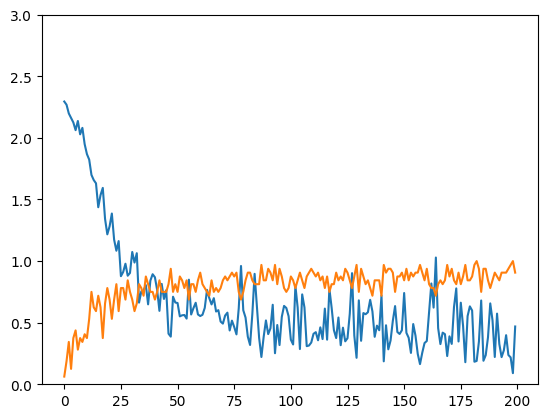

In [66]:
plt.ylim([0, 3])
plt.plot(losses)
plt.plot(accuracies)

In [64]:
output = torch.argmax(model(torch.tensor(X_test).float()/255), dim=1)
(Y_test == output.numpy()).mean()

0.5478

In [38]:
model.l1.weight.T.shape

torch.Size([784, 128])

In [37]:
model.l2.weight.T.shape

torch.Size([128, 10])

In [27]:
model.l2.bias.shape

torch.Size([10])

In [46]:
W1 = model.l1.weight.detach().numpy()
W2 = model.l2.weight.detach().numpy()
bias1 = model.l1.bias.detach().numpy()
bias2 = model.l2.bias.detach().numpy()

In [47]:
def ReLU(x): return np.maximum(0, x)

In [48]:
def forward(x):

    layer1 = ReLU(np.dot(x, W1.T) + bias1)
    output = np.dot(layer1, W2.T) + bias2

    return output

In [49]:
output = np.argmax(forward(X_test/255), axis=1)
(Y_test == output).mean()

0.9454

In [50]:
from PIL import Image

img_test = Image.open('/Users/daxire/Desktop/MNIST/old/output.png')
numpy_array = np.array(img_test)
numpy_array.shape

(28, 28)

In [53]:
pred = np.argmax(forward(numpy_array.reshape(784)/255))
pred

5

In [55]:
torch.save(model, 'mnistpytorchnetwork.pth')
model2 = torch.load('mnistpytorchnetwork.pth')
model2.eval()

Deepnetworks(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (act): ReLU()
  (l2): Linear(in_features=128, out_features=10, bias=True)
)